# Multivariate Time Series Manipulation & Visualization

## Overview

<style>
    table.custom-table {
        max-width: 1000px;
        width: 100%;
        margin: 0 auto; /* centers the table on the page */
    }

    table.custom-table td {
        background-color: #fff;
    }
    
    table.custom-table th, table.custom-table td {
        text-align: center;
        vertical-align: middle;
        padding: 5px;
        width: 333px; /* distribute the total width equally among three columns */
    }

    table.custom-table img {
        width: 100%;
        display: block; /* removes any gap under the image */
    }
</style>


<table class="custom-table">
    <thead>
        <tr>
            <th>Output: Accumulated Generation</th>
            <th>Output: Technology Relationship</th>
            <th>Input: Hourly Energy Generation</th>
        </tr>
    </thead>
    <tbody>
        <tr>
            <td>
                <img src="src/03_output_2.png" alt="Solar Image 1">
            </td>
            <td>
                <img src="src/03_output_1.png" alt="Solar Image 2">
            </td>
            <td>
                <img src="src/03_input.png" alt="Solar Image 3">
            </td>
        </tr>
    </tbody>
</table>


## Data

In [1]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('../../../data/energy_generation_hourly_year.csv', index_col=0, parse_dates=True)
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.00,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.600,516.600,1.000,287.7
2022-09-01 01:00:00,750.00,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.700,514.400,1.000,247.7
2022-09-01 02:00:00,777.50,1153.9,13644.750,3547.500,798.100,272.6,6873.9,78.000,512.700,1.200,239.7
2022-09-01 03:00:00,802.50,1146.0,13736.500,3188.650,795.500,273.0,6879.9,78.000,512.500,0.200,209.7
2022-09-01 04:00:00,816.25,1152.8,13706.825,2594.225,821.600,271.7,6873.9,78.100,513.100,0.400,231.5
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,472.50,2084.9,9390.275,2780.800,2335.900,228.4,6853.0,1611.600,493.575,5212.173,1691.6
2023-08-31 20:00:00,455.00,2141.1,10097.725,3072.800,3860.400,230.9,6857.0,1910.850,500.600,861.975,1039.1
2023-08-31 21:00:00,509.10,2149.1,11359.425,3057.150,3852.325,236.9,6864.0,1343.375,505.100,21.400,668.8


<Axes: xlabel='time'>

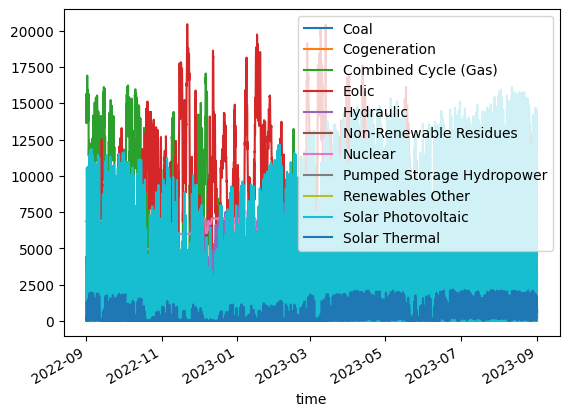

In [2]:
df.plot()

## Resampling the Time
- [Date offset `rule` list](https://pandas.pydata.org/docs/user_guide/timeseries.html#dateoffset-objects)
- [Pandas plot `kind` list](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.plot.html)

### Daily

<Axes: xlabel='time'>

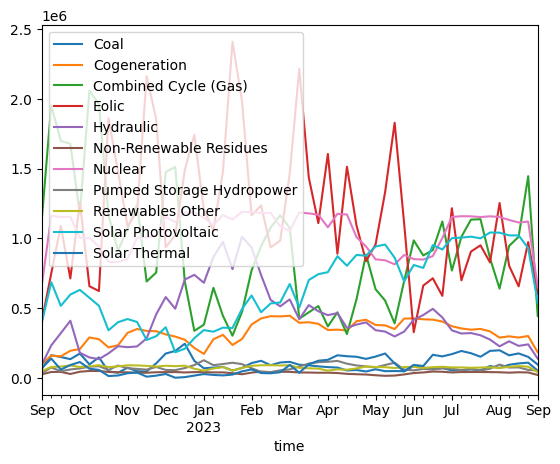

In [3]:
#Gráfica del resampleo de los datos para mostrar la sumatoria de los valores en frecuencia diaria.
df.resample(rule='D').sum().plot()

### Monthly

<Axes: xlabel='time'>

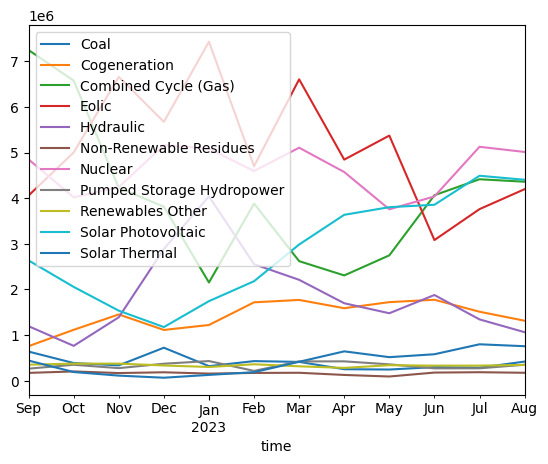

In [4]:
#Gráfica del resampleo de los datos para mostrar la sumatoria de los valores en frecuencia mensual.
df.resample(rule='M').sum().plot()

<Axes: xlabel='time'>

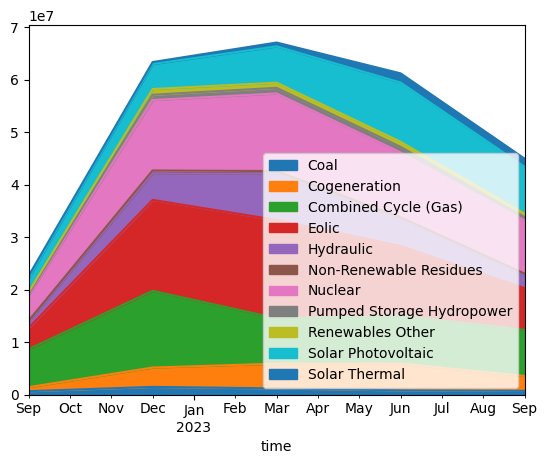

In [7]:
#Gráfica del resampleo de los datos para mostrar la sumatoria de los valores en frecuencia trimestral.
df.resample(rule='3M').sum().plot.area()

<Axes: xlabel='time'>

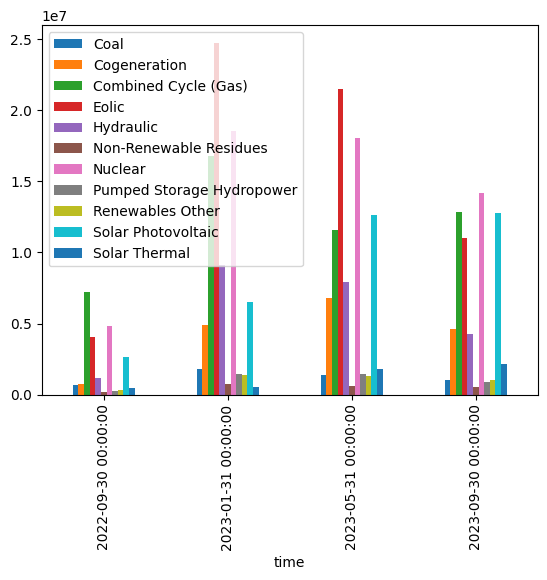

In [11]:
#Gráfica del resampleo de los datos para mostrar la sumatoria de los valores en frecuencia trimestral.
df.resample(rule='4M').sum().plot.bar()

## Visualize Time Series Correlation

In [14]:
df_Prom_semanal = df.resample(rule='W').mean()
df_Prom_semanal.head()

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-04,676.834375,1034.395417,11768.687667,4205.223573,981.462969,270.773177,6876.650000,346.673438,509.033333,4099.009125,733.104948
2022-09-11,974.569744,957.539524,11636.645256,4463.879530,1394.120833,258.569744,6916.088095,450.261500,469.940923,4089.397482,828.257208
2022-09-18,895.988292,923.868006,10118.453482,6494.471429,1912.348446,261.983827,6871.456649,292.003125,488.706786,3078.826393,361.562500
2022-09-25,804.334339,1163.319149,9992.283256,4250.401000,2443.903256,172.406899,6879.229762,364.408185,536.771786,3559.409429,553.506250
2022-10-02,1044.039286,1236.945077,6989.755905,7507.492512,1077.435673,269.415470,5981.345833,409.213048,470.915095,3761.823643,682.967732


<Axes: xlabel='Coal', ylabel='Combined Cycle (Gas)'>

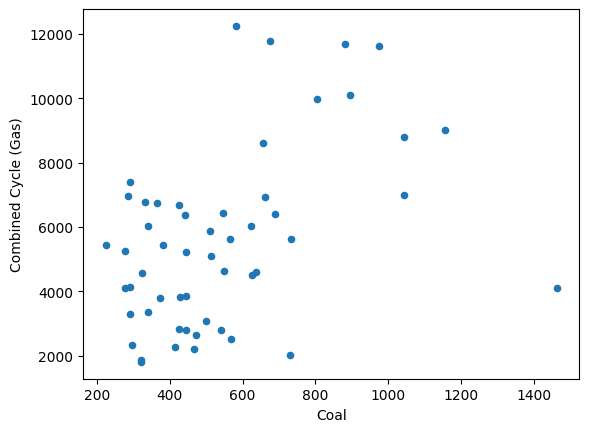

In [15]:
#Sin importar plotly solamente podemos hacer graficas uno a uno, en cambio,
#Plotly nos permite hacer scatter matrix y heatmap que nos permiten visualizar todas las relaciones.
df_Prom_semanal.plot.scatter(x='Coal', y='Combined Cycle (Gas)')

In [16]:
import plotly.express as px

## Correlation Matrix

- [Plotly Express Overview](https://plotly.com/python/plotly-express/#overview)

### Scatter Matrix

In [19]:
px.scatter_matrix(data_frame=df_Prom_semanal, height=1000, width=1000)

### Correlation Heatmap

In [20]:
corr_PromSem = df_Prom_semanal.corr()

In [37]:
px.imshow(img=corr_PromSem, 
          text_auto='.2f',
          color_continuous_scale= 'RdBu',
          height=1000, width=1000,
          zmax=1, zmin=-1)

## Other Plots

In [38]:
px.line(data_frame=df_Prom_semanal)

In [39]:
px.area(data_frame=df_Prom_semanal)

In [40]:
px.bar(data_frame=df_Prom_semanal)

## Pivot Tables

### Transform object to DataFrame

> Only if you don't have a DataFrame yet.

In [41]:
df

,Coal,Cogeneration,Combined Cycle (Gas),Eolic,Hydraulic,Non-Renewable Residues,Nuclear,Pumped Storage Hydropower,Renewables Other,Solar Photovoltaic,Solar Thermal
time,,,,,,,,,,,
2022-09-01 00:00:00,695.00,1155.1,14748.950,4387.050,899.675,273.7,6869.9,201.600,516.600,1.000,287.7
2022-09-01 01:00:00,750.00,1162.1,14255.600,4008.900,850.200,271.6,6881.9,117.700,514.400,1.000,247.7
2022-09-01 02:00:00,777.50,1153.9,13644.750,3547.500,798.100,272.6,6873.9,78.000,512.700,1.200,239.7
2022-09-01 03:00:00,802.50,1146.0,13736.500,3188.650,795.500,273.0,6879.9,78.000,512.500,0.200,209.7
2022-09-01 04:00:00,816.25,1152.8,13706.825,2594.225,821.600,271.7,6873.9,78.100,513.100,0.400,231.5
...,...,...,...,...,...,...,...,...,...,...,...
2023-08-31 19:00:00,472.50,2084.9,9390.275,2780.800,2335.900,228.4,6853.0,1611.600,493.575,5212.173,1691.6
2023-08-31 20:00:00,455.00,2141.1,10097.725,3072.800,3860.400,230.9,6857.0,1910.850,500.600,861.975,1039.1
2023-08-31 21:00:00,509.10,2149.1,11359.425,3057.150,3852.325,236.9,6864.0,1343.375,505.100,21.400,668.8


### Time series categories in one column

In [49]:
mdf = df.melt(ignore_index=False)

In [50]:
mdf.columns = ['Technology', 'Generation']

In [51]:
mdf

,Technology,Generation
time,,
2022-09-01 00:00:00,Coal,695.00
2022-09-01 01:00:00,Coal,750.00
2022-09-01 02:00:00,Coal,777.50
2022-09-01 03:00:00,Coal,802.50
2022-09-01 04:00:00,Coal,816.25
...,...,...
2023-08-31 19:00:00,Solar Thermal,1691.60
2023-08-31 20:00:00,Solar Thermal,1039.10
2023-08-31 21:00:00,Solar Thermal,668.80


### Create columns with datetime information

In [53]:
pre_pivotT = mdf.assign(
    year= mdf.index.year,
    month= mdf.index.month,
    day= mdf.index.day,
    hour= mdf.index.hour
)

### Process `pivot_table`

- Use this methodology.

In [55]:
energy_gen_PvT = (pre_pivotT
                  .pivot_table(
                      values='Generation',
                      index= 'Technology',
                      columns= ['year','month'],
                      aggfunc= sum
                  )
)
energy_gen_PvT

year                              2022                             \
month                               9             10           11   
Technology                                                          
Coal                        639985.519  3.892823e+05   338313.851   
Cogeneration                758832.665  1.117045e+06  1453732.367   
Combined Cycle (Gas)       7243462.233  6.575178e+06  4228190.235   
Eolic                      4058314.734  5.002114e+06  6657801.544   
Hydraulic                  1196005.549  7.654367e+05  1391812.347   
Non-Renewable Residues      173608.317  2.055724e+05   169995.455   
Nuclear                    4848734.117  4.018213e+06  4242623.506   
Pumped Storage Hydropower   266693.432  3.516397e+05   277689.163   
Renewables Other            353656.073  3.757617e+05   376646.552   
Solar Photovoltaic         2636219.180  2.056758e+06  1535995.490   
Solar Thermal               443376.236  1.922196e+05   113865.200   

year                                           2023                            \
month                               12           1            2            3    
Technology                                                                      
Coal                        725039.354   321210.350   431672.925   414233.325   
Cogeneration               1114179.283  1222612.611  1718877.593  1771577.988   
Combined Cycle (Gas)       3813010.445  2153531.745  3882381.006  2620595.306   
Eolic                      5671385.864  7426712.678  4700334.703  6603070.491   
Hydraulic                  2887101.515  4041380.886  2554076.675  2211987.869   
Non-Renewable Residues      186919.465   158238.665   172692.475   176156.523   
Nuclear                    5160890.875  5084310.825  4595234.300  5105777.575   
Pumped Storage Hydropower   374659.357   432653.945   217287.000   424853.204   
Renewables Other            335893.488   302861.605   362062.750   317720.598   
Solar Photovoltaic         1176871.031  1744956.450  2181165.122  2985426.080   
Solar Thermal                67765.475   129341.585   189183.825   416953.986   

year                                                                           \
month                               4            5            6            7    
Technology                                                                      
Coal                        254348.325   247080.557   300360.567   287284.165   
Cogeneration               1590191.493  1723153.516  1775275.345  1513263.491   
Combined Cycle (Gas)       2308295.976  2748103.121  4064754.767  4414524.924   
Eolic                      4844750.027  5370790.331  3083011.561  3759950.872   
Hydraulic                  1698988.674  1479940.098  1879424.373  1345345.479   
Non-Renewable Residues      128703.871    94462.833   180596.025   188383.516   
Nuclear                    4572679.525  3756453.292  4037975.917  5125490.100   
Pumped Storage Hydropower   426339.983   360518.088   272995.650   274013.217   
Renewables Other            282998.420   342303.780   332046.054   332801.973   
Solar Photovoltaic         3635891.249  3803151.814  3855930.011  4491017.672   
Solar Thermal               645285.245   518091.793   581982.910   800023.053   

year                                    
month                               8   
Technology                              
Coal                        421115.277  
Cogeneration               1316018.962  
Combined Cycle (Gas)       4360862.082  
Eolic                      4197239.743  
Hydraulic                  1065059.488  
Non-Renewable Residues      176125.117  
Nuclear                    5012412.170  
Pumped Storage Hydropower   351939.084  
Renewables Other            348525.661  
Solar Photovoltaic         4403223.582  
Solar Thermal               757878.191

### Style DataFrame

In [58]:
(energy_gen_PvT
                  .div(1_000_000)
                  .sort_values(by= (2022, 9), ascending=False)
                  .style.background_gradient('Blues')
                  .format(precision=2)
                  )